In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import date

In [2]:
## I acquire stock list in thailand ###
ex = pd.read_excel('listedCompanies_th_TH.xlsx', sheet_name='listedCompanies_th_TH',skiprows=1)
df = pd.DataFrame(ex['หลักทรัพย์'].astype('str') + '.bk')
df['market'] = ex['ตลาด']
df = df.rename(columns={'หลักทรัพย์' : 'ticker'})
df = df.reset_index(drop=True)
# df = df[:25]

In [3]:
# df = pd.DataFrame(['MO','ASO','HPQ','AMCX','AMLX','CROX','KO'],columns=['ticker'])
# df

### Acquire informations from yfinance function >> .info

In [4]:
# 1st pulling date for this data #
df['date_pulling'] = date.today()

In [5]:
# 2nd acquiring information from .info #
info_attribute_list = [
    'industry',
    'sector',
    'marketCap',
    'currentPrice',
    'enterpriseValue',
]
# 3rd acquiring information from .quarterly_balance_sheet #
balancesheet_list = [
    'Total Assets',
    'Current Liabilities'
]

# 4th acquiring information from .quarterly_financials #
ttm = 4
financials_list = [
    'EBIT'
]

info_attribute_list_buffer = []
balancesheet_list_buffer = []
financials_list_buffer = []
for i in range(len(df)):
    yfticker = yf.Ticker(df['ticker'][i])

    # 2nd acquiring information from .info #
    info_attribute_list_buffer_r = []
    for j in range(len(info_attribute_list)):
        try:
            info_attribute_list_buffer_r.append(yfticker.info[info_attribute_list[j]])
        except:
            info_attribute_list_buffer_r.append(None)
    info_attribute_list_buffer.append(info_attribute_list_buffer_r)

    # 3rd acquiring information from .balancesheet #
    balancesheet_list_buffer_r = []
    for j in range(len(balancesheet_list)):
        try:
            balancesheet_list_buffer_r.append(yfticker.quarterly_balance_sheet.loc[yfticker.quarterly_balance_sheet.index == balancesheet_list[j]].values[0][0])
        except:
            balancesheet_list_buffer_r.append(None)
    balancesheet_list_buffer.append(balancesheet_list_buffer_r)

    # 4th acquiring information from .quarterly_financials #
    financials_list_buffer_r = []
    for j in range(len(financials_list)):
        try:
            financials_list_buffer_r.append(np.array([yfticker.quarterly_financials.loc[yfticker.quarterly_financials.index == financials_list[j]].values[0][i] for i in range(ttm)]).sum())
        except:
            financials_list_buffer_r.append(None)
    try:
        financials_list_buffer_r.append(yfticker.quarterly_financials.columns[0])
    except:
        financials_list_buffer_r.append(None)
    financials_list_buffer.append(financials_list_buffer_r)

financials_list.append('ttm_lastest')
df = df.join(pd.DataFrame(info_attribute_list_buffer, columns=info_attribute_list))
df = df.join(pd.DataFrame(balancesheet_list_buffer, columns=balancesheet_list))
df = df.join(pd.DataFrame(financials_list_buffer, columns=financials_list))


##### Drop NAN #############
df = df.dropna()
##### Drop where marketcap and EBIT < 0#############
df = df.loc[df['enterpriseValue'] >0]
df = df.loc[df['EBIT'] >0]
df = df.reset_index(drop=True)


In [6]:

### Next I perform calculations for MF_ROC and MF_EY ###
df['MF_ROC'] = df['EBIT']/(df['Total Assets'] - df['Current Liabilities'])
df['MF_EY'] = df['EBIT']/df['enterpriseValue']
df

,ticker,market,date_pulling,industry,sector,marketCap,currentPrice,enterpriseValue,Total Assets,Current Liabilities,EBIT,ttm_lastest,MF_ROC,MF_EY
0,2S.bk,SET,2024-08-15,Steel,Basic Materials,1.605988e+09,2.92,1.336299e+09,2.400035e+09,3.039420e+08,1.225020e+08,2024-03-31,0.058443,0.091673
1,3K-BAT.bk,SET,2024-08-15,Electrical Equipment & Parts,Industrials,4.174800e+09,53.25,3.860087e+09,3.736470e+09,8.851644e+08,2.054459e+08,2024-03-31,0.072053,0.053223
2,A5.bk,mai,2024-08-15,Real Estate - Development,Real Estate,3.463320e+09,2.94,4.803302e+09,3.836102e+09,1.114288e+09,6.915935e+08,2024-03-31,0.254093,0.143983
3,AAI.bk,SET,2024-08-15,Packaged Foods,Consumer Defensive,1.317500e+10,6.20,1.234503e+10,5.828192e+09,5.910240e+08,9.276925e+08,2024-06-30,0.177136,0.075147
4,AAV.bk,SET,2024-08-15,Airlines,Industrials,2.852700e+10,2.22,7.243326e+10,7.252696e+10,2.862134e+10,3.279661e+09,2024-06-30,0.074698,0.045278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,YGG.bk,mai,2024-08-15,Entertainment,Communication Services,7.223964e+08,1.20,6.950683e+08,7.375050e+08,7.321346e+07,6.699039e+07,2024-03-31,0.100845,0.096380
654,YONG.bk,mai,2024-08-15,Building Materials,Basic Materials,8.023999e+08,1.18,1.302733e+09,1.304679e+09,3.079860e+08,1.533742e+08,2024-06-30,0.153883,0.117733
655,YUASA.bk,mai,2024-08-15,Auto Parts,Consumer Cyclical,1.173112e+09,10.90,7.629260e+08,1.684253e+09,4.092886e+08,1.939366e+08,2024-06-30,0.152111,0.254201
656,ZEN.bk,SET,2024-08-15,Restaurants,Consumer Cyclical,1.595290e+09,5.35,2.688539e+09,3.047779e+09,8.482120e+08,1.804910e+08,2024-06-30,0.082058,0.067133


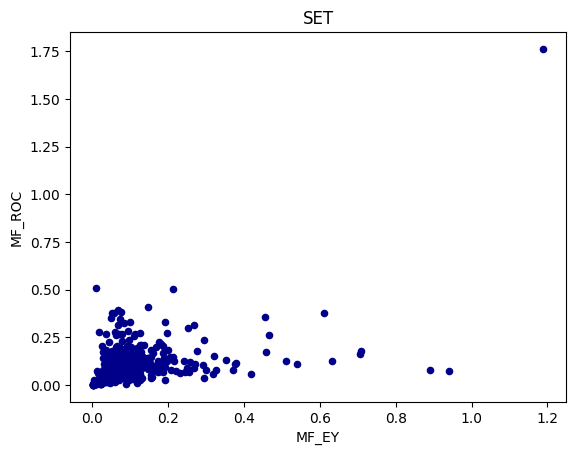

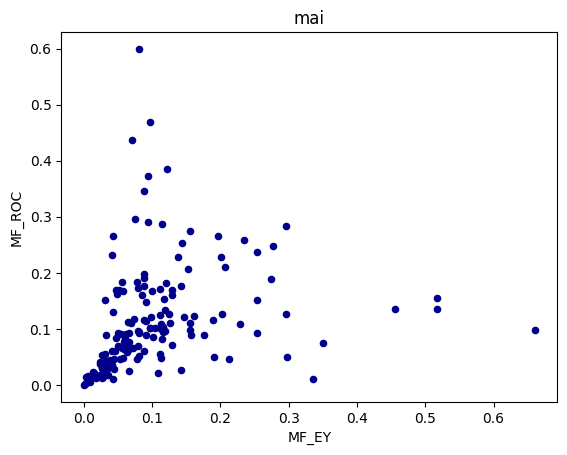

In [7]:
### Explore Market Cap ### By sector #### 
df.loc[df['market'] == 'SET'].plot.scatter(x='MF_EY',
                      y='MF_ROC',
                      c='DarkBlue',title = 'SET')
df.loc[df['market'] == 'mai'].plot.scatter(x='MF_EY',
                      y='MF_ROC',
                      c='DarkBlue',title = 'mai')

df.to_csv('data.csv',index= False)

In [38]:
df = pd.read_csv('data.csv')
df

,ticker,market,date_pulling,industry,sector,marketCap,currentPrice,enterpriseValue,Total Assets,Current Liabilities,EBIT,ttm_lastest,MF_ROC,MF_EY
0,2S.bk,SET,2024-08-15,Steel,Basic Materials,1.605988e+09,2.92,1.336299e+09,2.400035e+09,3.039420e+08,1.225020e+08,2024-03-31,0.058443,0.091673
1,3K-BAT.bk,SET,2024-08-15,Electrical Equipment & Parts,Industrials,4.174800e+09,53.25,3.860087e+09,3.736470e+09,8.851644e+08,2.054459e+08,2024-03-31,0.072053,0.053223
2,A5.bk,mai,2024-08-15,Real Estate - Development,Real Estate,3.463320e+09,2.94,4.803302e+09,3.836102e+09,1.114288e+09,6.915935e+08,2024-03-31,0.254093,0.143983
3,AAI.bk,SET,2024-08-15,Packaged Foods,Consumer Defensive,1.317500e+10,6.20,1.234503e+10,5.828192e+09,5.910240e+08,9.276925e+08,2024-06-30,0.177136,0.075147
4,AAV.bk,SET,2024-08-15,Airlines,Industrials,2.852700e+10,2.22,7.243326e+10,7.252696e+10,2.862134e+10,3.279661e+09,2024-06-30,0.074698,0.045278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,YGG.bk,mai,2024-08-15,Entertainment,Communication Services,7.223964e+08,1.20,6.950683e+08,7.375050e+08,7.321346e+07,6.699039e+07,2024-03-31,0.100845,0.096380
654,YONG.bk,mai,2024-08-15,Building Materials,Basic Materials,8.023999e+08,1.18,1.302733e+09,1.304679e+09,3.079860e+08,1.533742e+08,2024-06-30,0.153883,0.117733
655,YUASA.bk,mai,2024-08-15,Auto Parts,Consumer Cyclical,1.173112e+09,10.90,7.629260e+08,1.684253e+09,4.092886e+08,1.939366e+08,2024-06-30,0.152111,0.254201
656,ZEN.bk,SET,2024-08-15,Restaurants,Consumer Cyclical,1.595290e+09,5.35,2.688539e+09,3.047779e+09,8.482120e+08,1.804910e+08,2024-06-30,0.082058,0.067133


In [39]:
print('sector', df['sector'].unique())
print('industry', df['industry'].unique())

sector ['Basic Materials' 'Industrials' 'Real Estate' 'Consumer Defensive'
 'Utilities' 'Consumer Cyclical' 'Communication Services'
 'Financial Services' 'Healthcare' 'Technology' 'Energy']
industry ['Steel' 'Electrical Equipment & Parts' 'Real Estate - Development'
 'Packaged Foods' 'Airlines' 'Utilities - Renewable'
 'Auto & Truck Dealerships' 'Specialty Chemicals' 'Advertising Agencies'
 'Telecom Services' 'Credit Services' 'Textile Manufacturing' 'Auto Parts'
 'Medical Care Facilities' 'Farm Products' 'REIT - Retail'
 'REIT - Industrial' 'Capital Markets' 'Information Technology Services'
 'Waste Management' 'Industrial Distribution' 'REIT - Diversified'
 'Communication Equipment' 'Aluminum' 'Marine Shipping'
 'Scientific & Technical Instruments' 'Publishing' 'Real Estate Services'
 'Integrated Freight & Logistics' 'Airports & Air Services'
 'Household & Personal Products' 'Engineering & Construction'
 'Software - Application' 'Specialty Business Services'
 'Building Products & Eq

In [40]:
### Drop Utilities, Energy, and Financial Services  as suggested from the book ###
sectortoexclude = ['Utilities','Energy','Financial Services']
for i in sectortoexclude:
    print('exclude sector > ',i)
    try:
         
        df = df.loc[df['sector'] != i]
    except:
        None
        
industrytoexclude =[
    'Real Estate - Development',
    'Real Estate—Development',
    'Real Estate Services',
    'Engineering & Construction'
]
for i in industrytoexclude:
    print('exclude industry > ',i)
    try:
         
        df = df.loc[df['industry'] != i]
    except:
        None

df = df.reset_index(drop=True)

exclude sector >  Utilities
exclude sector >  Energy
exclude sector >  Financial Services
exclude industry >  Real Estate - Development
exclude industry >  Real Estate—Development
exclude industry >  Real Estate Services
exclude industry >  Engineering & Construction


In [41]:
#### Select market size by choosing ' market ' ###
market = 'SET'
df_market = df.loc[df['market'] == market]
df_market = df_market.reset_index(drop=True)

In [42]:
### Ranking regarding MFs####

df_market['Ranking_MF_ROC'] = df_market['MF_ROC'].rank()
df_market['Ranking_MF_EY'] = df_market['MF_EY'].rank()
df_market['Ranking_MF'] = df_market['Ranking_MF_ROC'] + df_market['Ranking_MF_EY']

df_market.loc[df_market['Ranking_MF'] == df_market['Ranking_MF'].max()]

,ticker,market,date_pulling,industry,sector,marketCap,currentPrice,enterpriseValue,Total Assets,Current Liabilities,EBIT,ttm_lastest,MF_ROC,MF_EY,Ranking_MF_ROC,Ranking_MF_EY,Ranking_MF
145,JAS.bk,SET,2024-08-15,Telecom Services,Communication Services,2.089602e+10,2.52,1.901533e+10,1.626863e+10,3.429412e+09,2.261779e+10,2024-06-30,1.761618,1.18945,368.0,368.0,736.0


In [43]:
df_sorted = df_market.sort_values(by=['Ranking_MF'],ascending=False)
df_sorted = df_sorted.reset_index(drop=True)
df_sorted[:50]

,ticker,market,date_pulling,industry,sector,marketCap,currentPrice,enterpriseValue,Total Assets,Current Liabilities,EBIT,ttm_lastest,MF_ROC,MF_EY,Ranking_MF_ROC,Ranking_MF_EY,Ranking_MF
0,JAS.bk,SET,2024-08-15,Telecom Services,Communication Services,2.089602e+10,2.52,1.901533e+10,1.626863e+10,3.429412e+09,2.261779e+10,2024-06-30,1.761618,1.189450,368.0,368.0,736.0
1,Q-CON.bk,SET,2024-08-15,Building Products & Equipment,Industrials,3.420000e+09,8.55,2.096408e+09,3.082648e+09,4.135580e+08,9.544314e+08,2024-06-30,0.357587,0.455270,360.0,363.0,723.0
2,TNR.bk,SET,2024-08-15,Household & Personal Products,Consumer Defensive,3.030000e+09,10.10,3.394016e+09,2.178707e+09,7.347250e+08,7.261320e+08,2024-06-30,0.502868,0.213945,366.0,343.0,709.0
3,AS.bk,SET,2024-08-15,Electronic Gaming & Multimedia,Communication Services,1.807274e+09,3.62,1.729659e+09,1.406244e+09,4.061850e+08,3.326363e+08,2024-06-30,0.332617,0.192313,357.0,335.0,692.0
4,UVAN.bk,SET,2024-08-15,Farm Products,Consumer Defensive,8.131000e+09,8.60,7.270002e+09,5.792787e+09,5.167410e+08,1.443106e+09,2024-06-30,0.273520,0.198502,349.0,338.0,687.0
5,PT.bk,SET,2024-08-15,Information Technology Services,Technology,2.526612e+09,8.90,2.624889e+09,2.410914e+09,1.457667e+09,3.886185e+08,2024-06-30,0.407679,0.148051,365.0,307.0,672.0
6,ICN.bk,SET,2024-08-15,Telecom Services,Communication Services,1.263548e+09,1.88,1.181206e+09,1.976144e+09,9.799810e+08,2.150695e+08,2024-06-30,0.215898,0.182076,339.0,329.0,668.0
7,NEX.bk,SET,2024-08-15,Electronic Components,Technology,1.277152e+09,0.64,1.162126e+09,1.261123e+10,7.608221e+09,8.197652e+08,2024-03-31,0.163854,0.705401,301.0,366.0,667.0
8,BIZ.bk,SET,2024-08-15,Medical Devices,Healthcare,1.898323e+09,3.16,1.427995e+09,1.669257e+09,5.431380e+08,2.524842e+08,2024-03-31,0.224207,0.176810,340.0,325.0,665.0
9,UTP.bk,SET,2024-08-15,Paper & Paper Products,Basic Materials,7.020000e+09,10.80,5.159186e+09,5.175989e+09,4.462890e+08,9.613716e+08,2024-06-30,0.203263,0.186342,332.0,331.0,663.0
